# Multiple Linear Regression Sklearn

https://towardsdatascience.com/predicting-house-prices-with-linear-regression-machine-learning-from-scratch-part-ii-47a0238aeac1

# Dataset from ETL notebook

In [19]:
# Imports
%matplotlib inline
import matplotlib.pyplot as plt
import numpy as np
import pandas as pd
# Import for correlation matrix
import seaborn as sn

In [20]:
df = pd.read_csv("Resources/house_crime.csv")
df.head()

,Unnamed: 0,suburb,rooms,type,price,bathroom,car,month,year,average_incidents
0,0,Abbotsford,2,h,1480000.0,1.0,1.0,12,2016,25.215686
1,1,Abbotsford,2,h,1035000.0,1.0,0.0,2,2016,25.215686
2,2,Abbotsford,3,h,1465000.0,2.0,0.0,3,2017,25.215686
3,3,Abbotsford,3,h,850000.0,2.0,1.0,3,2017,25.215686
4,4,Abbotsford,4,h,1600000.0,1.0,2.0,6,2016,25.215686


In [21]:
df = df.loc[:, ['suburb', 'rooms', 'type', 'price', 'bathroom', 'car',
       'month', 'year', 'average_incidents']]
df.head()

,suburb,rooms,type,price,bathroom,car,month,year,average_incidents
0,Abbotsford,2,h,1480000.0,1.0,1.0,12,2016,25.215686
1,Abbotsford,2,h,1035000.0,1.0,0.0,2,2016,25.215686
2,Abbotsford,3,h,1465000.0,2.0,0.0,3,2017,25.215686
3,Abbotsford,3,h,850000.0,2.0,1.0,3,2017,25.215686
4,Abbotsford,4,h,1600000.0,1.0,2.0,6,2016,25.215686


In [22]:
# Checking I have the right dataframe
df['suburb'].nunique()

338

# Correlation Matrix

Needs tidying up and exporting

<function matplotlib.pyplot.show(*args, **kw)>

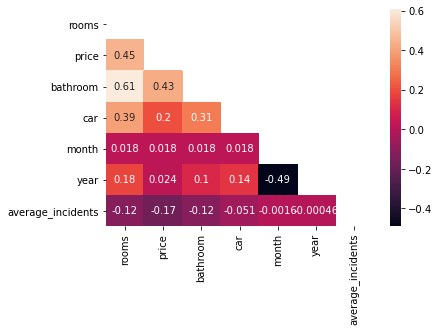

In [23]:
# Computing the correlation matrix
summed_corrMatrix = df.corr()
# Mask to cover the upper triangle so we only see one result for each correlation
mask = np.triu(np.ones_like(summed_corrMatrix, dtype=bool))
# Drawing the heatmap with the mask
sn.heatmap(summed_corrMatrix, mask = mask, annot = True);
# Exporting plot as PNG
# plt.savefig("Output/traits_corrMatrix")
# Colour scheme, add to the end of True
# , cmap = "RdYlGn_r"
# Display plot
plt.show

# Model

In [24]:
# Assign the data to X and y
## ANOTHER WAY TO DO THIS ... WHERE SET Y AND THE REST ARE X
X = df.drop("price", axis=1)
y = df["price"].values.reshape(-1, 1)
print(X.shape, y.shape)

(20423, 8) (20423, 1)


In [25]:
y

array([[1480000.],
       [1035000.],
       [1465000.],
       ...,
       [ 730000.],
       [ 615000.],
       [ 640000.]])

In [26]:
X.head()

,suburb,rooms,type,bathroom,car,month,year,average_incidents
0,Abbotsford,2,h,1.0,1.0,12,2016,25.215686
1,Abbotsford,2,h,1.0,0.0,2,2016,25.215686
2,Abbotsford,3,h,2.0,0.0,3,2017,25.215686
3,Abbotsford,3,h,2.0,1.0,3,2017,25.215686
4,Abbotsford,4,h,1.0,2.0,6,2016,25.215686


# Numberfy suburb

From notes on activity 4 class 21.1

Machine Learning algorithms work with numerical data. We have to convert our strings into meaningful numbers. We often use Integer, One-hot, or Binary Encoding. Sklearn provides a preprocessing libarary for all of these standard preprocessing techniques. Pandas also provides a get_dummies method that is useful to generate binary encoded data from a Data Frame.

# Should I be applying One-Hot Encoding?

Class 21.3 activity 1 - difference is that their y is being encoded, not an x value. I have 2 diff x values to one hot encode

In [159]:
z = df["suburb"]
z

0            Abbotsford
1            Abbotsford
2            Abbotsford
3            Abbotsford
4            Abbotsford
              ...      
20418       Clyde North
20419      Wandin North
20420       Lysterfield
20421          Kalkallo
20422    Werribee South
Name: suburb, Length: 20423, dtype: object

In [160]:
from sklearn.preprocessing import LabelEncoder

# Step 1: Label-encode data set
label_encoder = LabelEncoder()
label_encoder.fit(z)
encoded_z = label_encoder.transform(z)

In [161]:
for label, suburb in zip(encoded_z, z):
    print('Original Suburb: ' + str(suburb))
    print('Encoded Label: ' + str(label))
    print('-' * 12)

Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Suburb: Abbotsford
Encoded Label: 0
------------
Original Subur

Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
------------
Original Suburb: Ascot Vale
Encoded Label: 12
----------

Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original Suburb: Balwyn
Encoded Label: 21
------------
Original S

------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded Label: 30
------------
Original Suburb: Bentleigh East
Encoded La

Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------
Original Suburb: Brighton
Encoded Label: 42
------------


Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Suburb: Brunswick
Encoded Label: 47
------------
Original Subur

Encoded Label: 60
------------
Original Suburb: Camberwell
Encoded Label: 60
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbury
Encoded Label: 62
------------
Original Suburb: Canterbu

Encoded Label: 81
------------
Original Suburb: Clifton Hill
Encoded Label: 81
------------
Original Suburb: Clifton Hill
Encoded Label: 81
------------
Original Suburb: Clifton Hill
Encoded Label: 81
------------
Original Suburb: Clifton Hill
Encoded Label: 81
------------
Original Suburb: Clifton Hill
Encoded Label: 81
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Original Suburb: Coburg
Encoded Label: 83
------------
Orig

Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elsternwick
Encoded Label: 116
------------
Original Suburb: Elstern

Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzroy North
Encoded Label: 133
------------
Original Suburb: Fitzro

Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Iris
Encoded Label: 145
------------
Original Suburb: Glen Ir

Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------
Original Suburb: Hampton
Encoded Label: 153
------------

------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: Ivanhoe
Encoded Label: 170
------------
Original Suburb: I

Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Suburb: Kew East
Encoded Label: 182
------------
Original Subur

Encoded Label: 201
------------
Original Suburb: Maribyrnong
Encoded Label: 201
------------
Original Suburb: Maribyrnong
Encoded Label: 201
------------
Original Suburb: Maribyrnong
Encoded Label: 201
------------
Original Suburb: Maribyrnong
Encoded Label: 201
------------
Original Suburb: Maribyrnong
Encoded Label: 201
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Suburb: Melbourne
Encoded Label: 204
------------
Original Subur

Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------
Original Suburb: Niddrie
Encoded Label: 229
------------

Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe Vale
Encoded Label: 245
------------
Original Suburb: Pascoe 

Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encoded Label: 252
------------
Original Suburb: Preston
Encode

Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservoir
Encoded Label: 255
------------
Original Suburb: Reservo

------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Suburb: South Melbourne
Encoded Label: 276
------------
Original Sub

Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Label: 286
------------
Original Suburb: Strathmore
Encoded Labe

Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original Suburb: Surrey Hills
Encoded Label: 292
------------
Original

------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
------------
Original Suburb: Williamstown
Encoded Label: 329
--------

------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded Label: 48
------------
Original Suburb: Brunswick East
Encoded La

Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Hawthorn East
Encoded Label: 157
------------
Original Suburb: Heidelberg
Encoded Label: 161
------------
Original Suburb: Heidelberg
Encoded Label: 161
------------
Original Suburb: Heidelberg
Encoded Label: 161
------------
Original Suburb: Heidelberg
Enco

------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb: Albion
Encoded Label: 5
------------
Original Suburb

Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Cairnlea
Encoded Label: 59
------------
Original Suburb: Caroline Springs
Encoded Label: 66
------------
Original Suburb: Caroline Springs
Encoded Label: 66
------------
Original Suburb: Caroline Springs
Encoded Label: 66
------------
Original Suburb: Caroline Springs

------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Donvale
Encoded Label: 110
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
Encoded Label: 111
------------
Original Suburb: Doreen
En

Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encoded Label: 164
------------
Original Suburb: Highett
Encode

Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Label: 221
------------
Original Suburb: Mordialloc
Encoded Labe

------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: Sunbury
Encoded Label: 288
------------
Original Suburb: S

Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------
Original Suburb: Wollert
Encoded Label: 332
------------

Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Glen Waverley
Encoded Label: 146
------------
Original Suburb: Greenvale
Encoded Label: 150
------------
Original Suburb: Greenvale


------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
Original Suburb: Mulgrave
Encoded Label: 224
------------
O

Original Suburb: Albanvale
Encoded Label: 3
------------
Original Suburb: Albanvale
Encoded Label: 3
------------
Original Suburb: Beaconsfield Upper
Encoded Label: 26
------------
Original Suburb: Beaconsfield Upper
Encoded Label: 26
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 75
------------
Original Suburb: Chelsea Heights
Encoded Label: 

Original Suburb: Lynbrook
Encoded Label: 196
------------
Original Suburb: Research
Encoded Label: 254
------------
Original Suburb: Research
Encoded Label: 254
------------
Original Suburb: Research
Encoded Label: 254
------------
Original Suburb: Botanic Ridge
Encoded Label: 38
------------
Original Suburb: Bulla
Encoded Label: 50
------------
Original Suburb: Coldstream
Encoded Label: 85
------------
Original Suburb: Eynesbury
Encoded Label: 127
------------
Original Suburb: Cranbourne West
Encoded Label: 91
------------
Original Suburb: Cranbourne West
Encoded Label: 91
------------
Original Suburb: Cranbourne West
Encoded Label: 91
------------
Original Suburb: Wattle Glen
Encoded Label: 319
------------
Original Suburb: Ferny Creek
Encoded Label: 131
------------
Original Suburb: Clyde North
Encoded Label: 82
------------
Original Suburb: Wandin North
Encoded Label: 311
------------
Original Suburb: Lysterfield
Encoded Label: 197
------------
Original Suburb: Kalkallo
Encoded Lab

In [162]:
from keras.utils import to_categorical

# Step 2: One-hot encoding
one_hot_z = to_categorical(encoded_z)
one_hot_z

array([[1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       [1., 0., 0., ..., 0., 0., 0.],
       ...,
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.],
       [0., 0., 0., ..., 0., 0., 0.]], dtype=float32)

# Applying get_dummies for now

In [28]:
# This creates a column for every suburb and every house type 
# Values will be 1 or 0, 1 means it is this suburb or type
X = pd.get_dummies(X)
X.head()

,rooms,bathroom,car,month,year,average_incidents,suburb_Abbotsford,suburb_Aberfeldie,suburb_Airport West,suburb_Albanvale,...,suburb_Windsor,suburb_Wollert,suburb_Wonga Park,suburb_Wyndham Vale,suburb_Yallambie,suburb_Yarra Glen,suburb_Yarraville,type_h,type_t,type_u
0,2,1.0,1.0,12,2016,25.215686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
1,2,1.0,0.0,2,2016,25.215686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
2,3,2.0,0.0,3,2017,25.215686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
3,3,2.0,1.0,3,2017,25.215686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0
4,4,1.0,2.0,6,2016,25.215686,1,0,0,0,...,0,0,0,0,0,0,0,1,0,0


# Following class 21.1 activity 6

In [36]:
# Use train_test_split to create training and testing data
from sklearn.model_selection import train_test_split

X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

In [39]:
# Create the model using LinearRegression
from sklearn.linear_model import LinearRegression
model = LinearRegression()

In [40]:
# Fit the model to the training data and calculate the scores for the training and testing data
model.fit(X_train, y_train)
training_score = model.score(X_train, y_train)
testing_score = model.score(X_test, y_test)


print(f"Training Score: {training_score}")
print(f"Testing Score: {testing_score}")

Training Score: 0.6789297294382103
Testing Score: 0.6870547631175168


Text(0.5, 1.0, 'Residual Plot')

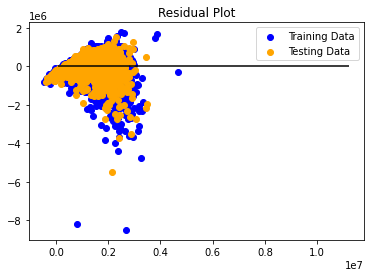

In [18]:
# Plot the Residuals for the Training and Testing data

plt.scatter(model.predict(X_train), model.predict(X_train) - y_train, c="blue", label="Training Data")
plt.scatter(model.predict(X_test), model.predict(X_test) - y_test, c="orange", label="Testing Data")
plt.legend()
plt.hlines(y=0, xmin=y.min(), xmax=y.max())
plt.title("Residual Plot")


# Look into the below and grid search 

# Scaling and Normalization to apply after splitting step above - I got             MSE: 8.394785989651144e+22, R2: -8.642438321789751e+22bad values             so did the above instead

The final step that we need to perform is scaling and normalization. Many algorithms will perform better with a normalized or scaled dataset. You may not see a difference with the Sklearn LinearRegression model, but other models that use gradient descent need normalization to help the algorithms converge to a local optima.


Sklearn provides a variety of scaling and normalization options. The two most common are minmax and StandardScaler. Use StandardScaler when you don't know anything about your data.

In [29]:
# # Split the data into Training and Testing using train_test_split
# from sklearn.model_selection import train_test_split

# X_train, X_test, y_train, y_test = train_test_split(X, y, random_state=42)

# X_train.head()

# StandardScaler

Now, we fit our StandardScaler model to our training data. We can apply this StandardScaler model to any future data. Note that we use this fit/transform approach so that we isolate our testing data from the training data that we use to fit our model. Otherwise, we might bias our model to the testing data. 

In [30]:
# from sklearn.preprocessing import StandardScaler
# X_scaler = StandardScaler().fit(X_train)
# y_scaler = StandardScaler().fit(y_train)

In [31]:
# X_train_scaled = X_scaler.transform(X_train)
# X_test_scaled = X_scaler.transform(X_test)
# y_train_scaled = y_scaler.transform(y_train)
# y_test_scaled = y_scaler.transform(y_test)

StandardScaler applies a Gaussian distribution to our data where the mean is 0 and the standard deviation is 1. We can see the difference in the following plots.

In [32]:
# # I think here you can swap bathroom to one of the x variables
# fig1 = plt.figure(figsize=(12, 6))
# axes1 = fig1.add_subplot(1, 2, 1)
# axes2 = fig1.add_subplot(1, 2, 2)

# axes1.set_title("Original Data")
# axes2.set_title("Scaled Data")

# maxx = X_train["bathroom"].max()
# maxy = y_train.max()
# axes1.set_xlim(-maxx + 1, maxx + 1)
# axes1.set_ylim(-maxy + 1, maxy + 1)

# axes2.set_xlim(-2, 2)
# axes2.set_ylim(-2, 2)

# def set_axes(ax):
#     ax.spines['left'].set_position('center')
#     ax.spines['right'].set_color('none')
#     ax.spines['bottom'].set_position('center')
#     ax.spines['top'].set_color('none')
#     ax.xaxis.set_ticks_position('bottom')
#     ax.yaxis.set_ticks_position('left')
    
# set_axes(axes1)
# set_axes(axes2)

# axes1.scatter(X_train["bathroom"], y_train)
# axes2.scatter(X_train_scaled[:,0], y_train_scaled[:])

# Fit the Model to the scaled training data and make predictions using the scaled test data

In [33]:
# from sklearn.linear_model import LinearRegression
# model = LinearRegression()
# model.fit(X_train_scaled, y_train_scaled)
# plt.scatter(model.predict(X_train_scaled), model.predict(X_train_scaled) - y_train_scaled, c="blue", label="Training Data")
# plt.scatter(model.predict(X_test_scaled), model.predict(X_test_scaled) - y_test_scaled, c="orange", label="Testing Data")
# plt.legend()
# plt.hlines(y=0, xmin=y_test_scaled.min(), xmax=y_test_scaled.max())
# plt.title("Residual Plot")
# plt.show()

# Quantify your model using the scaled data

In [34]:
# from sklearn.metrics import mean_squared_error

# predictions = model.predict(X_test_scaled)
# MSE = mean_squared_error(y_test_scaled, predictions)
# r2 = model.score(X_test_scaled, y_test_scaled)

# print(f"MSE: {MSE}, R2: {r2}")